In [119]:
from data_preprocessing_final import cleaning, dummify_func
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [98]:
housing = pd.read_csv('Ames_HousePrice.csv')

housing = housing[housing['SaleCondition'] == 'Normal']

In [99]:
halftime = cleaning(housing)

In [100]:
end, price = dummify_func(halftime)

In [101]:
price.head()

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000


In [120]:
price['SalePrice'] = np.log(price['SalePrice'])


In [102]:
end.head()

,PID,Unnamed: 0,GrLivArea,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,...,MiscVal_560,MiscVal_600,MiscVal_650,MiscVal_6500,MiscVal_700,MiscVal_750,MiscVal_80,MiscVal_800,MiscVal_8300,MiscVal_900
0,909176150,0.000000,0.131090,0.030802,0.485507,0.000000,0.149742,0.000000,0.0,0.25,...,0,0,0,0,0,0,0,0,0,0
1,905476230,0.001001,0.179558,0.013718,0.811594,0.566667,0.205106,0.000000,0.0,0.50,...,0,0,0,0,0,0,0,0,0,0
2,911128020,0.002002,0.167504,0.022249,0.420290,0.950000,0.191337,0.000000,0.0,0.25,...,0,0,0,0,0,0,0,0,0,0
3,535377150,0.003003,0.177047,0.031999,0.202899,0.883333,0.109868,0.172009,0.0,0.25,...,0,0,0,0,0,0,0,0,0,0
4,534177230,0.004004,0.334254,0.033186,0.934783,0.850000,0.136546,0.456731,0.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [103]:
end = end.drop(columns = 'Unnamed: 0', axis = 1)


In [104]:
end = end.drop(columns = 'PID', axis = 1)

In [105]:
end.head()

,GrLivArea,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,...,MiscVal_560,MiscVal_600,MiscVal_650,MiscVal_6500,MiscVal_700,MiscVal_750,MiscVal_80,MiscVal_800,MiscVal_8300,MiscVal_900
0,0.131090,0.030802,0.485507,0.000000,0.149742,0.000000,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
1,0.179558,0.013718,0.811594,0.566667,0.205106,0.000000,0.0,0.50,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,0.167504,0.022249,0.420290,0.950000,0.191337,0.000000,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
3,0.177047,0.031999,0.202899,0.883333,0.109868,0.172009,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,0.334254,0.033186,0.934783,0.850000,0.136546,0.456731,0.0,0.50,0.5,0.500000,...,0,0,0,0,0,0,0,0,0,0


In [108]:
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
import numpy as np
lasso = Lasso()
import warnings
warnings.filterwarnings('ignore')

In [110]:
len(end)

2413

In [ ]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3, 200, 100)
for alpha in alphaRange:
    lasso.set_params(alpha = alpha)  
    lasso.fit(end, price)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(end, price))


In [162]:

testIdxes = np.random.choice(range(2413), size = 350, replace = False)
trainIdxes = list(set(range(2413))-set(testIdxes))
trainX = end.iloc[trainIdxes]
testX  = end.iloc[testIdxes]
trainY = price.iloc[trainIdxes]
testY  = price.iloc[testIdxes]

In [167]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-4, 0.001, 100)
for alpha in alphaRange:
    lasso.set_params(alpha = alpha, normalize = False, max_iter = 10000)  
    lasso.fit(trainX, trainY)
    train_R2.append(lasso.score(trainX, trainY))
    test_R2.append(lasso.score(testX, testY))
    print(alpha, end = '\r')

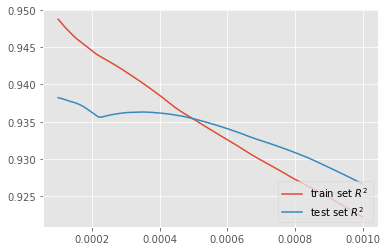

In [168]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [169]:
lasso.set_params(alpha = 0.00050, normalize= False)
lasso.fit(end, price)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index = end.columns)
print('The slopes are %s' %(lassoCoef))
pd.set_option('display.max_rows', None)

The intercept is 11.2013
The slopes are GrLivArea                   1.158205
LotArea                     0.088333
YearBuilt                   0.202744
YearRemodAdd                0.062344
1stFlrSF                    0.320764
2ndFlrSF                    0.000000
LowQualFinSF               -0.000000
FullBath                    0.003965
HalfBath                    0.018760
BedroomAbvGr               -0.000000
KitchenAbvGr               -0.000000
TotRmsAbvGrd                0.000000
Fireplaces                  0.061425
WoodDeckSF                  0.029156
OpenPorchSF                 0.028414
EnclosedPorch               0.000000
3SsnPorch                   0.000000
ScreenPorch                 0.074817
PoolArea                    0.000000
MSZoning_C (all)           -0.033083
MSZoning_FV                 0.021386
MSZoning_I (all)           -0.000000
MSZoning_RH                 0.000000
MSZoning_RL                 0.052520
MSZoning_RM                -0.000000
Street_Pave                -0.00000

In [170]:
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs

GrLivArea                   1.158205
1stFlrSF                    0.320764
OverallQual_9               0.233439
OverallQual_10              0.228761
YearBuilt                   0.202744
OverallCond_3               0.152632
OverallQual_2               0.123565
OverallQual_8               0.110038
BsmtExposure_No_Basement    0.101742
Neighborhood_MeadowV        0.095513
Neighborhood_Crawfor        0.092247
OverallQual_3               0.091574
LotArea                     0.088333
OverallQual_4               0.081801
Neighborhood_Somerst        0.079914
ScreenPorch                 0.074817
OverallCond_4               0.066961
Functional_Typ              0.063456
YearRemodAdd                0.062344
BsmtExposure_Gd             0.061933
Fireplaces                  0.061425
BldgType_Twnhs              0.061068
MSSubClass_160              0.060680
CentralAir_Y                0.060353
BsmtFinType1_Unf            0.057098
OverallCond_7               0.056727
OverallCond_9               0.054902
G

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
x_1, x_2, y_1, y_2 = train_test_split(end, price, test_size = 0.2, random_state = 0)

In [82]:
lasso.fit(x_1, y_1)
print("The R square on the trainig data: ", lasso.score(x_1, y_1))
print("The R square on the test data: ", lasso.score(x_2, y_2)) 

The R square on the trainig data:  0.9402546714632032
The R square on the test data:  0.924016870169426


In [88]:
kfold = KFold(n_splits=5)

scores = cross_val_score(lasso, x_1, y_1, cv = kfold)
print(scores)

[0.92115953 0.91269806 0.91914876 0.92029587 0.93868562]


In [90]:
lasso.get_params()

{'alpha': 50.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 2000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [173]:
params = {
    "alpha": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
}

In [175]:
gs = GridSearchCV(lasso, params, cv = kfold)
gs.fit(x_1, y_1)
gs.cv_results_

{'mean_fit_time': array([2.6684679 , 2.63500919, 2.67836609, 2.7496285 , 3.48437362,
        2.97598362]),
 'std_fit_time': array([0.05170421, 0.04566096, 0.07103642, 0.100468  , 0.73505219,
        0.0519551 ]),
 'mean_score_time': array([0.00648012, 0.00640283, 0.00639839, 0.00750175, 0.01042857,
        0.00730329]),
 'std_score_time': array([0.0001049 , 0.00028435, 0.00021068, 0.00129142, 0.00592133,
        0.00083809]),
 'param_alpha': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.0002},
  {'alpha': 0.0003},
  {'alpha': 0.0004},
  {'alpha': 0.0005},
  {'alpha': 0.0006}],
 'split0_test_score': array([0.72452999, 0.72501076, 0.72548351, 0.72594823, 0.72640494,
        0.72685361]),
 'split1_test_score': array([0.90174099, 0.90173756, 0.9017341 , 0.90173062, 0.90172711,
        0.90172357]),
 'split2_tes